# KIVA Data

Name: Dylan Connor and Kaung Khin  
Andrew ID: dmconnor | Kkhin

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.display.max_columns = None

In [110]:
import dill
dill.dump_session('notebook_env_wrangle.db')
#dill.load_session('notebook_env_wrangle.db')

## Load and Wrangle Data

In [3]:
# Source: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding
loans = pd.read_csv("input_data/kiva_loans.csv")
region_mpi = pd.read_csv("input_data/kiva_mpi_region_locations.csv")
theme = pd.read_csv("input_data/loan_theme_ids.csv")
theme_reg = pd.read_csv("input_data/loan_themes_by_region.csv")
mpi = pd.read_excel("input_data/MPI_countries.xlsx")
ISO_code = pd.read_csv("input_data/ISO_2.csv")

In [5]:
theme_reg.shape

(15736, 20)

In [58]:
loans['region'].isna().sum()

56800

In [59]:
loans.loc[loans['region'].isna(),'region'] = loans.loc[loans['region'].isna(),'country_code']

In [60]:
loans['region'] = loans['region'].apply(lambda v : v.lower())

In [61]:
loans.shape

(671205, 20)

In [62]:
loans.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01


In [63]:
plt.figure(figsize=(8,6))
#loans['partner_id'].value_counts().plot()
loans['partner_id'].value_counts().head()

145.0    107188
199.0     19446
177.0     16414
311.0     15837
156.0     15516
Name: partner_id, dtype: int64

In [64]:
ISO_code.loc[ISO_code['ISO_2'] == 'US']

,Country,ISO_2,ISO_3
234,United States of America,US,USA


In [65]:
loans = pd.merge(loans, ISO_code, how = 'left', left_on= ["country_code"], right_on = ["ISO_2"])
loans = pd.merge(loans, mpi, how = "left", left_on = "ISO_3", right_on = "ISO")

In [66]:
loans = loans.drop(['ISO_2', 'ISO', 'Country'], axis = 1)

In [67]:
loans['MPI'] = loans['MPI'].fillna(0)

In [69]:
loans.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO_3,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,0.23032


In [70]:
loans.describe(include = 'all')

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO_3,MPI
count,6.712050e+05,671205.000000,671205.000000,671205,671205,666973,671197,671205,671205,671205,657698.000000,671205,668809,622874,671205.000000,671205.000000,499789,666984,671205,671205,669786,671205.000000
unique,NaN,NaN,NaN,163,15,424912,86,87,12738,67,NaN,667399,5719,498007,NaN,NaN,86719,11298,4,1298,86,NaN
top,NaN,NaN,NaN,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,sv,PHP,NaN,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,NaN,NaN,user_favorite,female,monthly,2017-03-20,PHL,NaN
freq,NaN,NaN,NaN,72955,180302,5217,160441,160441,20251,160440,NaN,25,2800,33,NaN,NaN,27088,426502,342717,1308,160441,NaN
mean,9.932486e+05,785.995061,842.397107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.199616,NaN,NaN,NaN,13.739022,20.590922,NaN,NaN,NaN,NaN,NaN,0.116783
std,1.966113e+05,1130.398941,1198.660073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.247581,NaN,NaN,NaN,8.598919,28.459551,NaN,NaN,NaN,NaN,NaN,0.116243
min,6.530470e+05,0.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,8.230720e+05,250.000000,275.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.000000,NaN,NaN,NaN,8.000000,7.000000,NaN,NaN,NaN,NaN,NaN,0.029003
50%,9.927800e+05,450.000000,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000,NaN,NaN,NaN,13.000000,13.000000,NaN,NaN,NaN,NaN,NaN,0.052128
75%,1.163653e+06,900.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.000000,NaN,NaN,NaN,14.000000,24.000000,NaN,NaN,NaN,NaN,NaN,0.187418


In [71]:
region_mpi.head(2)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538


In [72]:
region_mpi.describe(include = 'all')

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
count,984,1008,1008,984,1008,984.000000,2772,892.000000,892.000000
unique,984,102,102,928,6,NaN,881,NaN,NaN
top,"East, Rwanda",NGA,Nigeria,Central,Sub-Saharan Africa,NaN,"(1000.0, 1000.0)",NaN,NaN
freq,1,37,37,8,432,NaN,1880,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.211330,NaN,9.169710,16.635888
std,NaN,NaN,NaN,NaN,NaN,0.183621,NaN,16.484531,61.234566
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-34.947896,-122.747131
25%,NaN,NaN,NaN,NaN,NaN,0.053000,NaN,-1.027901,-12.819854
50%,NaN,NaN,NaN,NaN,NaN,0.155000,NaN,11.211379,26.419389
75%,NaN,NaN,NaN,NaN,NaN,0.341500,NaN,18.084292,47.019436


In [73]:
theme.head(2)

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0


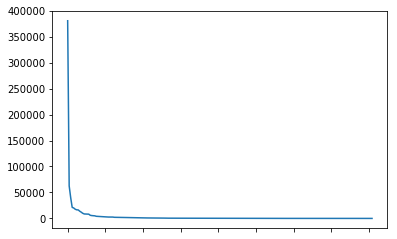

In [74]:
theme["Loan Theme Type"].value_counts().plot()

In [75]:
theme.describe(include = 'all')

,id,Loan Theme ID,Loan Theme Type,Partner ID
count,7.790920e+05,764279,764279,764279.000000
unique,NaN,956,203,NaN
top,NaN,a1050000000wf0q,General,NaN
freq,NaN,110264,380693,NaN
mean,1.047475e+06,NaN,NaN,180.825840
std,2.282538e+05,NaN,NaN,97.914029
min,6.386310e+05,NaN,NaN,9.000000
25%,8.499768e+05,NaN,NaN,126.000000
50%,1.046528e+06,NaN,NaN,145.000000
75%,1.244768e+06,NaN,NaN,204.000000


In [76]:
theme_reg.head(2)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo
0,171,Bai Tushum Bank,General Financial Inclusion,a1050000002YqaF,Green,Kyrgyzstan,No,"""The first May"" village",NaN,KGZ,2,1700,"""The first May"" village, Kyrgyzstan","[(42.7338599, 78.3689411)]",1 May; Tyup; Tyup; Issyk-Kul Region; Kyrgyzstan,"(42.7338599, 78.3689411)",42.73386,78.368941,KGZ,NaN
1,171,Bai Tushum Bank,General Financial Inclusion,a1050000007QIg8,Agriculture,Kyrgyzstan,No,"""The first May"" village",NaN,KGZ,1,300,"""The first May"" village, Kyrgyzstan","[(42.7338599, 78.3689411)]",1 May; Tyup; Tyup; Issyk-Kul Region; Kyrgyzstan,"(42.7338599, 78.3689411)",42.73386,78.368941,KGZ,NaN


In [77]:
theme_reg.describe(include = 'all')

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo
count,15736.000000,15736,15736,15736,15736,15736,15736,15736,1200,15722,15736.000000,1.573600e+04,15736,13662,13661,15736,13662.000000,13662.000000,15722,9671
unique,NaN,302,11,718,170,79,2,9526,340,77,NaN,NaN,9561,6557,6275,6558,NaN,NaN,392,335
top,NaN,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,Chouf,"(-1.2833333, 36.8166667)",PHL,NaN,NaN,"Chouf, Lebanon","[(19.7126764, 105.8393447)]",Philippines,"(1000.0, 1000.0)",NaN,NaN,"Northern Mindanao, Philippines","(8.020163499999999, 124.6856509)"
freq,NaN,1207,13679,1152,5661,3467,13211,25,20,3467,NaN,NaN,25,43,137,2074,NaN,NaN,1174,1174
mean,191.376144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.628432,2.003991e+04,NaN,NaN,NaN,NaN,14.328878,29.433569,NaN,NaN
std,118.705003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,403.079799,9.636941e+04,NaN,NaN,NaN,NaN,16.757689,83.255739,NaN,NaN
min,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.500000e+01,NaN,NaN,NaN,NaN,-34.610548,-172.790661,NaN,NaN
25%,123.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,9.500000e+02,NaN,NaN,NaN,NaN,6.266728,-71.967463,NaN,NaN
50%,154.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,2.600000e+03,NaN,NaN,NaN,NaN,13.484101,41.899993,NaN,NaN
75%,217.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,8.750000e+03,NaN,NaN,NaN,NaN,22.189940,106.677321,NaN,NaN


In [78]:
# Source: https://build.kiva.org/
loans_2 = pd.read_csv("input_data/loans.csv", usecols= ['id', 'original_language', 'status', 'planned_expiration_time']) #, nrows = 1000000)

In [79]:
loans_2.columns

Index(['id', 'original_language', 'status', 'planned_expiration_time'], dtype='object')

In [80]:
loans_2.head()

,id,original_language,status,planned_expiration_time
0,466993,Spanish,funded,2012-10-10 17:20:08+00:00
1,468275,Spanish,funded,2012-10-13 01:10:02+00:00
2,468837,English,funded,2012-10-09 17:10:15+00:00
3,468882,Spanish,expired,2012-10-14 10:50:02+00:00
4,469762,English,funded,2012-10-11 02:10:10+00:00


In [81]:
merged = pd.merge(loans, loans_2, how = 'inner')

In [82]:
merged.shape

(671205, 25)

In [83]:
merged.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO_3,MPI,original_language,status,planned_expiration_time
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,0.23032,English,funded,2014-03-02 07:10:02+00:00
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,PAK,0.23032,English,funded,2014-01-31 10:10:02+00:00


In [84]:
merged3 = pd.merge(merged, theme, how = 'inner', left_on=['id'], right_on=['id'] )

In [85]:
merged3.shape

(671199, 28)

In [86]:
#Without being able to match region appropriately in the main data set, this can only be collapsed
theme_reg.groupby(['Partner ID','Loan Theme ID','region']).apply(lambda s : len(s)).head()

Partner ID  Loan Theme ID    region                  
9           a1050000000slfi  Banteay Meanchey            1
                             Battambang Province         1
                             Kampong Cham Province       1
                             Kampong Chhnang Province    1
                             Kampong Speu Province       1
dtype: int64

In [87]:
grps = theme_reg[['Partner ID', 'Loan Theme ID', 'number', 'amount', 'lat', 'lon']].groupby(['Partner ID','Loan Theme ID'])


In [88]:
theme_reg_agg = grps.agg({'number': 'sum','amount':'sum','lat':'mean','lon':'mean'}).reset_index()

In [89]:
merged4 = pd.merge(merged3, theme_reg_agg, how = 'left', left_on=['partner_id','Loan Theme ID'], right_on=['Partner ID','Loan Theme ID'])

In [90]:
merged4.shape

(671199, 33)

In [91]:
merged4.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO_3,MPI,original_language,status,planned_expiration_time,Loan Theme ID,Loan Theme Type,Partner ID_x,Partner ID_y,number,amount,lat,lon
0,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,lahore,PKR,247,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,PAK,0.23032,English,funded,2014-01-31 10:10:02+00:00,a1050000000sjEC,Underserved,247.0,247.0,9569.0,4171675.0,30.0854,71.581756


In [92]:
merged4.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'ISO_3', 'MPI', 'original_language', 'status',
       'planned_expiration_time', 'Loan Theme ID', 'Loan Theme Type',
       'Partner ID_x', 'Partner ID_y', 'number', 'amount', 'lat', 'lon'],
      dtype='object')

In [93]:
merged4['status'].value_counts()

funded         621964
expired         42310
fundRaising      5343
refunded         1582
Name: status, dtype: int64

In [342]:
#merged_trim = merged4[['loan_amount', 'activity', 'sector', 'country', 'currency', 'status', 'Partner ID', 'lat', 'lon']]
#merged_trim.apply(lambda s : s.isnull().sum())
#merged_trim.to_csv("output_data/merged_data_trim.csv")

In [94]:
merged4 = merged4.drop(['funded_time','tags'], axis =1)

In [95]:
merged4.apply(lambda s : s.isna().sum())

id                             0
funded_amount                  0
loan_amount                    0
activity                       0
sector                         0
use                         4231
country_code                   8
country                        0
region                         0
currency                       0
partner_id                 13507
posted_time                    0
disbursed_time              2396
term_in_months                 0
lender_count                   0
borrower_genders            4220
repayment_interval             0
date                           0
ISO_3                       1419
MPI                            0
original_language           4220
status                         0
planned_expiration_time        0
Loan Theme ID              13507
Loan Theme Type            13507
Partner ID_x               13507
Partner ID_y               42232
number                     42232
amount                     42232
lat                        42533
lon       

In [96]:
merged4.loc[merged4['status']=='expired'].apply(lambda s : s.isna().sum())

id                            0
funded_amount                 0
loan_amount                   0
activity                      0
sector                        0
use                          10
country_code                  0
country                       0
region                        0
currency                      0
partner_id                 1879
posted_time                   0
disbursed_time             1879
term_in_months                0
lender_count                  0
borrower_genders              4
repayment_interval            0
date                          0
ISO_3                       197
MPI                           0
original_language             4
status                        0
planned_expiration_time       0
Loan Theme ID              1879
Loan Theme Type            1879
Partner ID_x               1879
Partner ID_y               3231
number                     3231
amount                     3231
lat                        3231
lon                        3231
dtype: i

In [348]:
merged4.shape

(671199, 31)

In [97]:
merged4 = merged4.dropna()

In [351]:
#column_nulls = merged4.apply(lambda s : s.isnull().sum())

In [352]:
#a = list(column_nulls.loc[column_nulls< 117628].index.values)
#a.remove('funded_time')
#a


In [353]:

#ml_data = merged4['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use', 
#                  'country_code', 'country','region', 'currency', 'partner_id', '
                  
#ml_data = merged4[a]
#ml_data.head(1)

In [98]:
ml_data = merged4[merged4['status']!='fundRaising']

In [99]:
ml_data.shape

(618813, 31)

In [358]:
ml_data.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'term_in_months', 'lender_count',
       'borrower_genders', 'repayment_interval', 'date', 'ISO', 'MPI',
       'original_language', 'status', 'planned_expiration_time',
       'Loan Theme ID', 'Loan Theme Type', 'Partner ID_x', 'Partner ID_y',
       'number', 'amount', 'lat', 'lon'],
      dtype='object')

In [100]:
import datetime
ml_data['planned_expiration_time'].apply(lambda v : v.split(" ")[0]).value_counts().head()


2014-03-27    2436
2014-03-26    2306
2017-07-20    1430
2015-02-05    1148
2014-12-03    1129
Name: planned_expiration_time, dtype: int64

In [101]:
t = "2014-03-27"
t2 = "2014-03-05"
d = datetime.date(*(int(s) for s in t.split('-')))
d2 = datetime.date(*(int(s) for s in t2.split('-')))
(d - d2).days

22

In [102]:
ml_data['days_to_expiration'] = (ml_data['planned_expiration_time'].apply(lambda v : datetime.date(*(int(s) for s in (v.split(" ")[0]).split('-')))) - 
 ml_data['date'].apply(lambda v : datetime.date(*(int(s) for s in v.split("-")))))

C:\Users\dmcph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
ml_data['days_to_expiration'] = ml_data['days_to_expiration'].apply(lambda v : v.days)

C:\Users\dmcph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
ml_data['year'] = ml_data['date'].apply(lambda v : v.split("-")[0])
ml_data['month'] = ml_data['date'].apply(lambda v : v.split("-")[1])
ml_data['year'].head()

C:\Users\dmcph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dmcph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    2014
1    2014
2    2014
3    2014
5    2014
Name: year, dtype: object

In [105]:
ml_data.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'term_in_months', 'lender_count',
       'borrower_genders', 'repayment_interval', 'date', 'ISO_3', 'MPI',
       'original_language', 'status', 'planned_expiration_time',
       'Loan Theme ID', 'Loan Theme Type', 'Partner ID_x', 'Partner ID_y',
       'number', 'amount', 'lat', 'lon', 'days_to_expiration', 'year',
       'month'],
      dtype='object')

In [106]:
ml_data_trim = ml_data[['status', 'loan_amount', 'activity', 'sector','country', 'currency', 'partner_id', 'number', 'amount','date',
                  'term_in_months', 'borrower_genders', 'repayment_interval', 'original_language', 'days_to_expiration',
                  'year', 'month', 'lat', 'lon','MPI']]
                  

In [107]:
ml_data_trim['status'].value_counts()

funded     579934
expired     38879
Name: status, dtype: int64

In [108]:
ml_data_trim.to_csv("output_data/ML_Final_Data_v2.csv")

In [109]:
status = ml_data_trim['status']
ml_data_trim = ml_data_trim.drop('status', axis = 1)
status.value_counts()


funded     579934
expired     38879
Name: status, dtype: int64